# Transfer Learning With CNNs
Applied to family faces classification

TASK : 
- 9 persons, 
- 50 original pictures each (used for TESTING)
- 1000 generated pictures each (used for TRAINING)

Usefull libraries to import at the end of this notebook

In [8]:
# Constant number of labels
NUM_CLASSES = 9
#IMAGE_SIZE = 96 , square image shape


## Usefull classes

In [ ]:
def plot_training_history(history, model):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()

# PART Ia - Transfer Learning (MOBILENET V2)

### LOADING AND PREPARING TRAINING IMAGES and LABELS

In [10]:
image_big_dataset_list_training=glob.glob("Faces_extracted_family_QCed\TRAINING\*\*.png")
print(len(image_big_dataset_list_training))

9000


In [12]:
# FOR THE SHORT BUT BALANCED DATASET (1000 IMAGES GENERATED + 50 ORIGINAL FOR EACH PERSON) 
labels_code_big_dataset_training = []
for i in range(1000):
    labels_code_big_dataset_training.append("CLAUDINE")
for i in range(1000):
    labels_code_big_dataset_training.append("EVA")
for i in range(1000):
    labels_code_big_dataset_training.append("JEREMY")
for i in range(1000):
    labels_code_big_dataset_training.append("JULIEN")
for i in range(1000):
    labels_code_big_dataset_training.append("LAURENT")
for i in range(1000):
    labels_code_big_dataset_training.append("OLIVIA")
for i in range(1000):
    labels_code_big_dataset_training.append("SANDRINE")
for i in range(1000):
    labels_code_big_dataset_training.append("TOM")
for i in range(1000):
    labels_code_big_dataset_training.append("YVES")

In [13]:
print(len(labels_code_big_dataset_training))

9000


##### It is handy to have the labels (strings) expressed both as CATEGORY (0 to 8) for Output layer

In [15]:
# CATEGORY Label Encoding (le) method
le = preprocessing.LabelEncoder()

In [16]:
# convert the input long labels string vector into a set of unique lables
le.fit(labels_code_big_dataset_training)

LabelEncoder()

In [17]:
# And here shown as list
labels_list=list(le.classes_)
print(labels_list)

['CLAUDINE', 'EVA', 'JEREMY', 'JULIEN', 'LAURENT', 'OLIVIA', 'SANDRINE', 'TOM', 'YVES']


In [18]:
#use this transformation on the global label data set to convert into integers
labels_code_CATEGORY_big_dataset_training =le.transform(labels_code_big_dataset_training)

In [19]:
print(len(labels_code_CATEGORY_big_dataset_training),labels_code_CATEGORY_big_dataset_training)

9000 [0 0 0 ... 8 8 8]


In [20]:
# From the Integer label, we can go back to string label with inverse transformation
print(le.inverse_transform([3]))

['JULIEN']


### Now compiling TRAINING images / Input data

In [21]:
image_array_big_dataset_training=np.zeros(shape=(len(image_big_dataset_list_training),96,96,3))
for i in range(len(image_big_dataset_list_training)):
    image_loaded=image.load_img((image_big_dataset_list_training[i]),target_size=(96,96))
    image_array_big_dataset_training[i]=image_loaded

In [22]:
image_array_big_dataset_training.shape

(9000, 96, 96, 3)

In [23]:
type(image_array_big_dataset_training)

numpy.ndarray

### LOADING AND PREPARING TESTING IMAGE BIG DATA SET

In [25]:
image_big_dataset_list_testing=glob.glob("Faces_extracted_family_QCed\TESTING\*\*.png")
print(len(image_big_dataset_list_testing))

450


In [27]:
# FOR THE SHORT BUT BALANCED DATASET (50 ORIGINAL FOR EACH PERSON) 
labels_code_big_dataset_testing = []
for i in range(50):
    labels_code_big_dataset_testing.append("CLAUDINE")
for i in range(50):
    labels_code_big_dataset_testing.append("EVA")
for i in range(50):
    labels_code_big_dataset_testing.append("JEREMY")
for i in range(50):
    labels_code_big_dataset_testing.append("JULIEN")
for i in range(50):
    labels_code_big_dataset_testing.append("LAURENT")
for i in range(50):
    labels_code_big_dataset_testing.append("OLIVIA")
for i in range(50):
    labels_code_big_dataset_testing.append("SANDRINE")
for i in range(50):
    labels_code_big_dataset_testing.append("TOM")
for i in range(50):
    labels_code_big_dataset_testing.append("YVES")

In [28]:
print(len(labels_code_big_dataset_testing))

450


In [30]:
# convert the input long labels string vector into the SAME a set of unique labels
le.fit(labels_code_big_dataset_testing)

LabelEncoder()

In [31]:
#use this transformation on the global label data set to convert into integers
labels_code_CATEGORY_big_dataset_testing =le.transform(labels_code_big_dataset_testing)

In [32]:
print(len(labels_code_CATEGORY_big_dataset_testing),labels_code_CATEGORY_big_dataset_testing)

450 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8]


### Now compiling TESTING images / Input data

In [33]:
image_array_big_dataset_testing=np.zeros(shape=(len(image_big_dataset_list_testing),96,96,3))
for i in range(len(image_big_dataset_list_testing)):
    image_loaded=image.load_img((image_big_dataset_list_testing[i]),target_size=(96,96))
    image_array_big_dataset_testing[i]=image_loaded

In [34]:
image_array_big_dataset_testing.shape

(450, 96, 96, 3)

### FINAL FORMATING IMAGES BEFORE INPUT TO MOBILNET_V2

In [81]:
def adjust_input_image_mobilnet_v2(rgb_data):
    adjusted = ppi_mobilnet_v2(rgb_data)
    
    return adjusted

In [38]:
X_training = np.array([adjust_input_image_mobilnet_v2(x) for x in image_array_big_dataset_training])

(array([1.000e+00, 4.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 1.451e+03,
        3.000e+00, 1.700e+01, 9.000e+00, 7.000e+00, 9.000e+00, 1.700e+01,
        2.800e+01, 7.500e+01, 1.110e+02, 2.110e+02, 2.640e+02, 2.440e+02,
        2.010e+02, 1.450e+02, 1.410e+02, 1.560e+02, 1.800e+02, 1.780e+02,
        1.690e+02, 2.140e+02, 2.600e+02, 1.920e+02, 2.350e+02, 2.930e+02,
        3.460e+02, 3.730e+02, 3.570e+02, 4.250e+02, 3.810e+02, 3.660e+02,
        3.410e+02, 3.270e+02, 2.810e+02, 2.400e+02, 2.330e+02, 1.590e+02,
        1.030e+02, 8.400e+01, 1.080e+02, 6.800e+01, 8.600e+01, 6.100e+01,
        4.200e+01, 9.000e+00]),
 array([-0.89019608, -0.87466667, -0.85913725, -0.84360784, -0.82807843,
        -0.81254902, -0.79701961, -0.7814902 , -0.76596078, -0.75043137,
        -0.73490196, -0.71937255, -0.70384314, -0.68831373, -0.67278431,
        -0.6572549 , -0.64172549, -0.62619608, -0.61066667, -0.59513725,
        -0.57960784, -0.56407843, -0.54854902, -0.53301961, -0.5174902 ,
        -0.

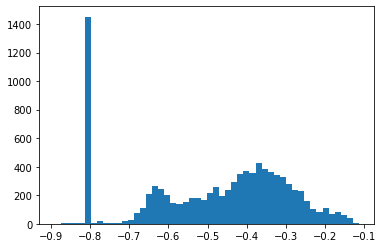

In [39]:
plt.hist(np.ravel(X_training[0,:,:,2]), bins=50)

In [40]:
X_training.shape,X_training[2,:,:,2]

((9000, 96, 96, 3),
 array([[-0.80392157, -0.80392157, -0.80392157, ..., -0.80392157,
         -0.80392157, -0.80392157],
        [-0.80392157, -0.80392157, -0.80392157, ..., -0.80392157,
         -0.80392157, -0.80392157],
        [-0.80392157, -0.80392157, -0.80392157, ..., -0.80392157,
         -0.80392157, -0.80392157],
        ...,
        [-0.80392157, -0.80392157, -0.80392157, ..., -0.80392157,
         -0.80392157, -0.80392157],
        [-0.80392157, -0.80392157, -0.80392157, ..., -0.80392157,
         -0.80392157, -0.80392157],
        [-0.80392157, -0.80392157, -0.80392157, ..., -0.80392157,
         -0.80392157, -0.80392157]]))

In [41]:
y_training = to_categorical(labels_code_CATEGORY_big_dataset_training, NUM_CLASSES)

In [43]:
X_testing = np.array([adjust_input_image_mobilnet_v2(x) for x in image_array_big_dataset_testing])

(array([  2.,   0.,   1.,   3.,  10.,  14.,  17.,  48.,  72., 163., 172.,
        185., 237., 412., 304., 244., 264., 224., 352., 227., 235., 207.,
        341., 236., 298., 293., 341., 498., 361., 320., 336., 491., 305.,
        275., 282., 293., 334., 174., 131., 112., 139.,  95.,  59.,  55.,
         18.,  25.,   4.,   4.,   1.,   2.]),
 array([-0.8745098 , -0.85709804, -0.83968627, -0.82227451, -0.80486275,
        -0.78745098, -0.77003922, -0.75262745, -0.73521569, -0.71780392,
        -0.70039216, -0.68298039, -0.66556863, -0.64815686, -0.6307451 ,
        -0.61333333, -0.59592157, -0.5785098 , -0.56109804, -0.54368627,
        -0.52627451, -0.50886275, -0.49145098, -0.47403922, -0.45662745,
        -0.43921569, -0.42180392, -0.40439216, -0.38698039, -0.36956863,
        -0.35215686, -0.3347451 , -0.31733333, -0.29992157, -0.2825098 ,
        -0.26509804, -0.24768627, -0.23027451, -0.21286275, -0.19545098,
        -0.17803922, -0.16062745, -0.14321569, -0.12580392, -0.10839216,
 

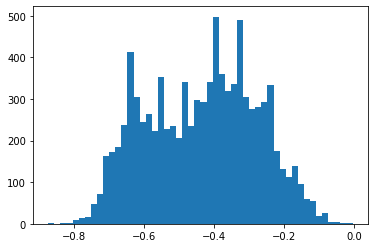

In [44]:
plt.hist(np.ravel(X_testing[0,:,:,2]), bins=50)

In [46]:
y_testing = to_categorical(labels_code_CATEGORY_big_dataset_testing, NUM_CLASSES)

In [48]:
# MOBILENET V2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96,96, 3))

# Layers go from 0-154
#   initial=0-9
#   block1 = 10-18
#   block2 = 19-27
#   block3 = 28-36
#   block4 = 37-45
#   block5 = 46-54
#   block6 = 55-63
#.  block7 = 64-72
#   block8 = 73-81
#.  block9 = 81-90
#   block10= 91-98
#   block11= 99-107
#.  block12= 108-116
#.  block13= 117-125
#   block14= 126-134
#.  block15= 135-143
#.  block16= 144-151
#.  final_conv = 152, 
#   conv_bn 153
#   out_relu = 154


In [49]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_exp

In [50]:
base_model.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

block_5_project_BN (BatchNormal (None, 12, 12, 32)   128         block_5_project[0][0]            
__________________________________________________________________________________________________
block_5_add (Add)               (None, 12, 12, 32)   0           block_4_add[0][0]                
                                                                 block_5_project_BN[0][0]         
__________________________________________________________________________________________________
block_6_expand (Conv2D)         (None, 12, 12, 192)  6144        block_5_add[0][0]                
__________________________________________________________________________________________________
block_6_expand_BN (BatchNormali (None, 12, 12, 192)  768         block_6_expand[0][0]             
__________________________________________________________________________________________________
block_6_expand_relu (ReLU)      (None, 12, 12, 192)  0           block_6_expand_BN[0][0]          
__________

In [1]:
# LONG PROCESS HERE
# KERACT allows to visualize each layer
keract_inputs = X_training[:1]
keract_targets = y_training[:1]
activations = get_activations(base_model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

In [52]:
training_features = base_model.predict(X_training)
#np.savez('MobileNetV2_features_train', features=training_features)

In [53]:
training_features.shape

(9000, 3, 3, 1280)

In [54]:
testing_features = base_model.predict(X_testing)
#np.savez('MobileNetV2_features_test', features=testing_features)

In [55]:
testing_features.shape

(450, 3, 3, 1280)

In [56]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=training_features.shape[1:]))

# Note from the summary, this will result in 1280 nodes, let's use the classic "squeeze" and add dropout
model.add(Dense(units=640, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=320, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
history = model.fit(training_features, y_training, batch_size=32, epochs=20, validation_split=0.2, verbose=True,
                   shuffle=True)

Train on 7200 samples, validate on 1800 samples
Epoch 1/20
7200/7200 [==============================] - 6s 833us/sample - loss: 1.1216 - accuracy: 0.6090 - val_loss: 7.3124 - val_accuracy: 0.0000e+00
Epoch 2/20
7200/7200 [==============================] - 4s 589us/sample - loss: 0.5114 - accuracy: 0.8190 - val_loss: 7.9877 - val_accuracy: 0.1611
Epoch 3/20
7200/7200 [==============================] - 4s 591us/sample - loss: 0.3301 - accuracy: 0.8864 - val_loss: 7.9415 - val_accuracy: 0.1972
Epoch 4/20
7200/7200 [==============================] - 4s 588us/sample - loss: 0.2595 - accuracy: 0.9094 - val_loss: 8.8323 - val_accuracy: 0.3033
Epoch 5/20
7200/7200 [==============================] - 4s 589us/sample - loss: 0.2169 - accuracy: 0.9267 - val_loss: 10.8435 - val_accuracy: 0.2978
Epoch 6/20
7200/7200 [==============================] - 4s 591us/sample - loss: 0.1673 - accuracy: 0.9451 - val_loss: 9.8026 - val_accuracy: 0.3083
Epoch 7/20
7200/7200 [==============================] - 4s 

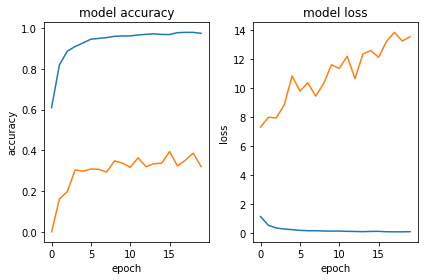

Test loss: 7.22
Test accuracy: 0.369


In [58]:
plot_training_history(history, model)
loss, accuracy = model.evaluate(testing_features, y_testing, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

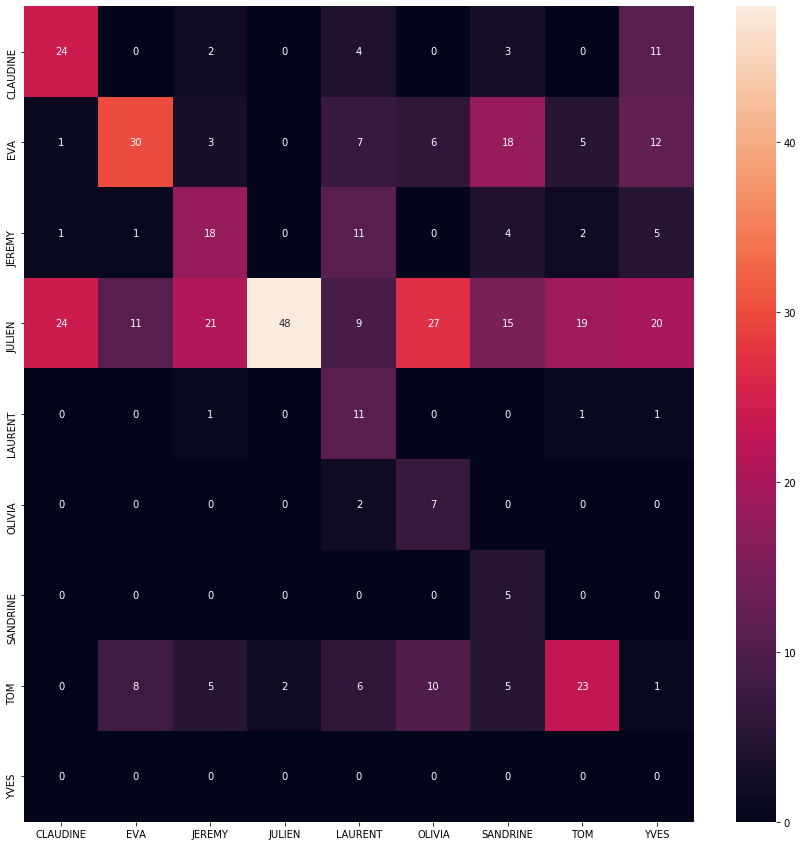

In [59]:
# When did our evaluator do poorly?
predictions = model.predict(testing_features)
cm = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(y_testing, axis=1))
plt.figure(figsize = (15, 15))

name_labels = labels_list

sn.heatmap(cm, annot=True, xticklabels=name_labels, yticklabels=name_labels)
plt.show()

# PART Ib - Transfer Learning (RESNET50)

### FINAL FORMATING IMAGES BEFORE INPUT TO LEGACY NET

In [123]:
def adjust_input_image_resnet50(rgb_data):
    adjusted = ppi_resnet50(rgb_data)
    
    return adjusted

In [124]:
# Need to preprocess every time the INPUT images (not the OUTPUT labels) to properly fit the legacy CNN NetWork
X_training = np.array([adjust_input_image_resnet50(x) for x in image_array_big_dataset_training])

In [125]:
X_testing = np.array([adjust_input_image_resnet50(x) for x in image_array_big_dataset_testing])

In [126]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(96,96, 3))

In [127]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_11
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_b

In [128]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 102, 102, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 48, 48, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 48, 48, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
__________________________________________________________________________________________________


In [2]:
# LONG PROCESS HERE
# KERACT allows to visualize each layer
keract_inputs = X_training[:1]
keract_targets = y_training[:1]
activations = get_activations(base_model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

In [130]:
training_features = base_model.predict(X_training)
#np.savez('MobileNetV2_features_train', features=training_features)

In [131]:
training_features.shape,training_features[0,:,:,1000]

((9000, 3, 3, 2048),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=float32))

In [132]:
training_features.shape

(9000, 3, 3, 2048)

In [133]:
testing_features = base_model.predict(X_testing)
#np.savez('MobileNetV2_features_test', features=testing_features)

In [134]:
testing_features.shape

(450, 3, 3, 2048)

In [140]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=training_features.shape[1:]))

model.add(Dense(units=640, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=320, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [141]:
history = model.fit(training_features, y_training, batch_size=32, epochs=20, validation_split=0.2, verbose=True,
                   shuffle=True)

Train on 7200 samples, validate on 1800 samples
Epoch 1/20
7200/7200 [==============================] - 9s 1ms/sample - loss: 1.4904 - accuracy: 0.4976 - val_loss: 5.4360 - val_accuracy: 0.0289
Epoch 2/20
7200/7200 [==============================] - 6s 882us/sample - loss: 0.8665 - accuracy: 0.6989 - val_loss: 5.7370 - val_accuracy: 0.1089
Epoch 3/20
7200/7200 [==============================] - 6s 859us/sample - loss: 0.6627 - accuracy: 0.7690 - val_loss: 7.5872 - val_accuracy: 0.0517
Epoch 4/20
7200/7200 [==============================] - 6s 838us/sample - loss: 0.5469 - accuracy: 0.8079 - val_loss: 6.7034 - val_accuracy: 0.1656
Epoch 5/20
7200/7200 [==============================] - 6s 850us/sample - loss: 0.4710 - accuracy: 0.8353 - val_loss: 7.9591 - val_accuracy: 0.2328
Epoch 6/20
7200/7200 [==============================] - 7s 913us/sample - loss: 0.3964 - accuracy: 0.8619 - val_loss: 8.8663 - val_accuracy: 0.2217
Epoch 7/20
7200/7200 [==============================] - 6s 884us/s

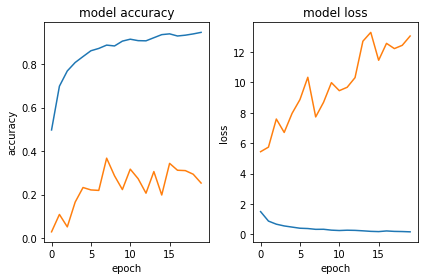

Test loss: 3.76
Test accuracy: 0.667


In [142]:
plot_training_history(history, model)
loss, accuracy = model.evaluate(testing_features, y_testing, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

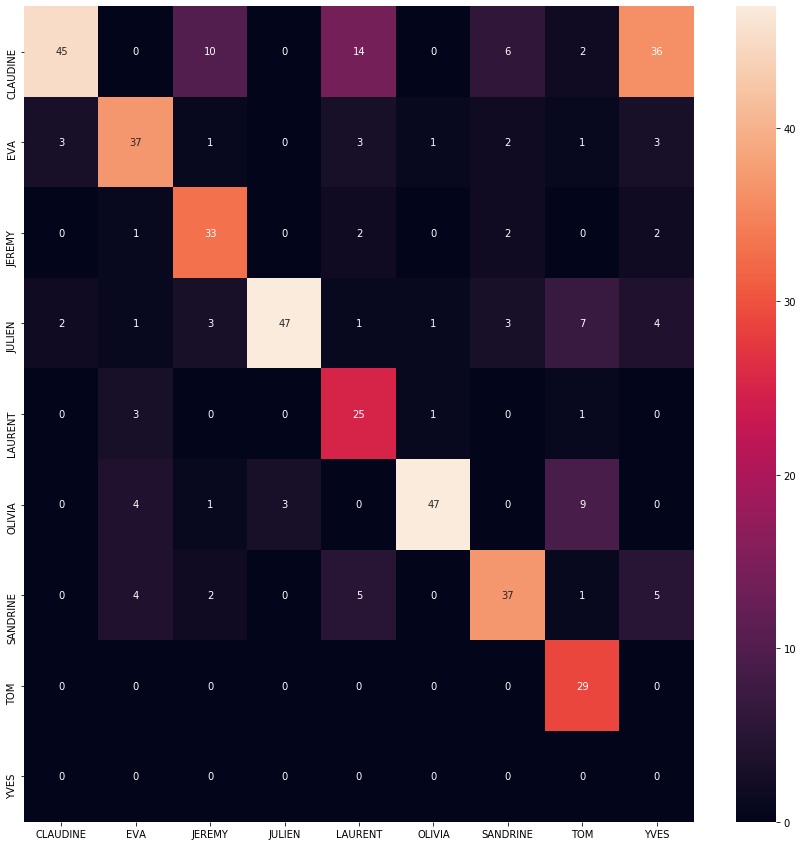

In [143]:
# When did our evaluator do poorly?
predictions = model.predict(testing_features)
cm = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(y_testing, axis=1))
plt.figure(figsize = (15, 15))

name_labels = labels_list

sn.heatmap(cm, annot=True, xticklabels=name_labels, yticklabels=name_labels)
plt.show()

# PART Ic - Transfer Learning (XCEPTION)

### FINAL FORMATING IMAGES BEFORE INPUT TO LEGACY NET

In [39]:
def adjust_input_image_xception(rgb_data):
    adjusted = ppi_xception(rgb_data)
    
    return adjusted

In [40]:
X_training = np.array([adjust_input_image_xception(x) for x in image_array_big_dataset_training])

In [41]:
X_testing = np.array([adjust_input_image_xception(x) for x in image_array_big_dataset_testing])

In [42]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(96,96, 3))

In [43]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_1
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_2
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_act

In [44]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 47, 47, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 47, 47, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 47, 47, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [3]:
# LONG PROCESS HERE
# KERACT allows to visualize each layer
keract_inputs = X_training[:1]
keract_targets = y_training[:1]
activations = get_activations(base_model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

In [45]:
training_features = base_model.predict(X_training)
#np.savez('MobileNetV2_features_train', features=training_features)

In [46]:
training_features.shape

(9000, 3, 3, 2048)

In [47]:
testing_features = base_model.predict(X_testing)
#np.savez('MobileNetV2_features_test', features=testing_features)

In [48]:
testing_features.shape

(450, 3, 3, 2048)

In [49]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=training_features.shape[1:]))

model.add(Dense(units=640, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=320, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
history = model.fit(training_features, y_training, batch_size=32, epochs=20, validation_split=0.2, verbose=True,
                   shuffle=True)

Train on 7200 samples, validate on 1800 samples
Epoch 1/20
7200/7200 [==============================] - 10s 1ms/sample - loss: 1.4812 - accuracy: 0.4618 - val_loss: 6.4830 - val_accuracy: 0.0000e+00
Epoch 2/20
7200/7200 [==============================] - 6s 870us/sample - loss: 1.0492 - accuracy: 0.6183 - val_loss: 8.3482 - val_accuracy: 0.0100
Epoch 3/20
7200/7200 [==============================] - 6s 839us/sample - loss: 0.8547 - accuracy: 0.6899 - val_loss: 7.4202 - val_accuracy: 0.0206
Epoch 4/20
7200/7200 [==============================] - 6s 838us/sample - loss: 0.7276 - accuracy: 0.7400 - val_loss: 8.3841 - val_accuracy: 0.0533
Epoch 5/20
7200/7200 [==============================] - 7s 907us/sample - loss: 0.6665 - accuracy: 0.7636 - val_loss: 8.9047 - val_accuracy: 0.0967
Epoch 6/20
7200/7200 [==============================] - 6s 806us/sample - loss: 0.5755 - accuracy: 0.7985 - val_loss: 9.5398 - val_accuracy: 0.1661
Epoch 7/20
7200/7200 [==============================] - 6s 84

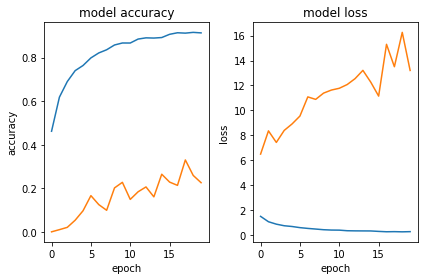

Test loss: 5.58
Test accuracy: 0.613


In [54]:
plot_training_history(history, model)
loss, accuracy = model.evaluate(testing_features, y_testing, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

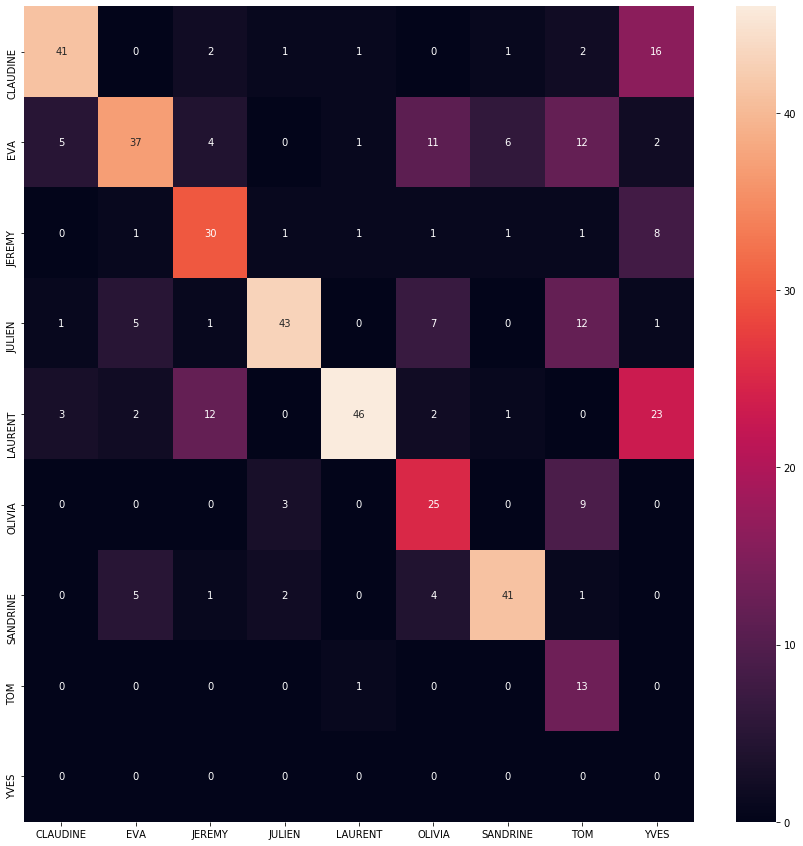

In [55]:
# When did our evaluator do poorly?
predictions = model.predict(testing_features)
cm = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(y_testing, axis=1))
plt.figure(figsize = (15, 15))

name_labels = labels_list

sn.heatmap(cm, annot=True, xticklabels=name_labels, yticklabels=name_labels)
plt.show()

# PART Id - Transfer Learning (VGG19)

### FINAL FORMATING IMAGES BEFORE INPUT TO LEGACY NET

In [86]:
def adjust_input_image_vgg19(rgb_data):
    adjusted = ppi_vgg19(rgb_data)
    
    return adjusted

In [87]:
X_training = np.array([adjust_input_image_vgg19(x) for x in image_array_big_dataset_training])

In [88]:
X_testing = np.array([adjust_input_image_vgg19(x) for x in image_array_big_dataset_testing])

In [89]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(96,96, 3))

In [90]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool


In [91]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [4]:
# LONG PROCESS HERE
# KERACT allows to visualize each layer
keract_inputs = X_training[:1]
keract_targets = y_training[:1]
activations = get_activations(base_model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

In [93]:
training_features = base_model.predict(X_training)
#np.savez('MobileNetV2_features_train', features=training_features)

In [94]:
training_features.shape

(9000, 3, 3, 512)

In [96]:
testing_features = base_model.predict(X_testing)
#np.savez('MobileNetV2_features_test', features=testing_features)

In [97]:
testing_features.shape

(450, 3, 3, 512)

In [98]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=training_features.shape[1:]))

model.add(Dense(units=640, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=320, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
history = model.fit(training_features, y_training, batch_size=32, epochs=20, validation_split=0.2, verbose=True,
                   shuffle=True)

Train on 7200 samples, validate on 1800 samples
Epoch 1/20
7200/7200 [==============================] - 5s 668us/sample - loss: 1.8074 - accuracy: 0.4614 - val_loss: 6.4530 - val_accuracy: 0.0289
Epoch 2/20
7200/7200 [==============================] - 3s 424us/sample - loss: 0.9424 - accuracy: 0.6689 - val_loss: 7.9513 - val_accuracy: 0.1156
Epoch 3/20
7200/7200 [==============================] - 3s 425us/sample - loss: 0.6804 - accuracy: 0.7600 - val_loss: 9.1605 - val_accuracy: 0.1033
Epoch 4/20
7200/7200 [==============================] - 3s 430us/sample - loss: 0.5629 - accuracy: 0.8071 - val_loss: 9.4723 - val_accuracy: 0.1461
Epoch 5/20
7200/7200 [==============================] - 3s 440us/sample - loss: 0.4589 - accuracy: 0.8418 - val_loss: 9.5726 - val_accuracy: 0.1711
Epoch 6/20
7200/7200 [==============================] - 3s 430us/sample - loss: 0.3919 - accuracy: 0.8671 - val_loss: 10.5115 - val_accuracy: 0.1800
Epoch 7/20
7200/7200 [==============================] - 3s 424u

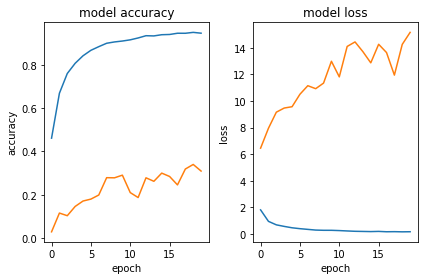

Test loss: 6.69
Test accuracy: 0.633


In [100]:
plot_training_history(history, model)
loss, accuracy = model.evaluate(testing_features, y_testing, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

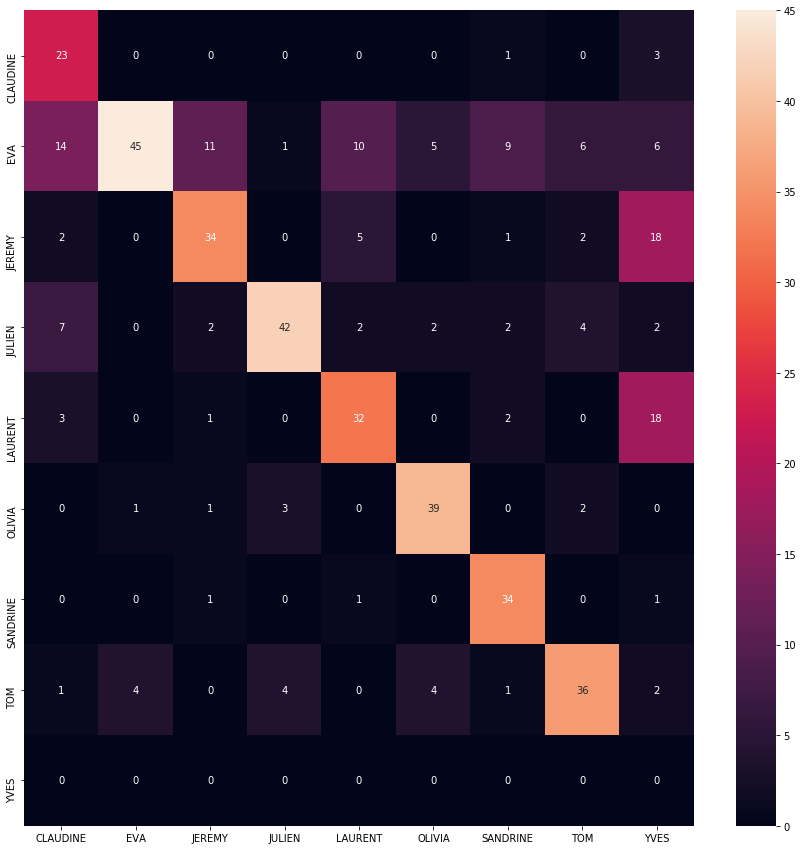

In [101]:
# When did our evaluator do poorly?
predictions = model.predict(testing_features)
cm = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(y_testing, axis=1))
plt.figure(figsize = (15, 15))

name_labels = labels_list

sn.heatmap(cm, annot=True, xticklabels=name_labels, yticklabels=name_labels)
plt.show()

# PART 2 - Ignoring Some Layers and Fine Tuning (MOBILENET_V2)

### FINAL FORMATING IMAGES BEFORE INPUT TO LEGACY NET

In [37]:
def adjust_input_image_mobilnet_v2(rgb_data):
    adjusted = ppi_mobilnet_v2(rgb_data)
    
    return adjusted

In [38]:
X_training = np.array([adjust_input_image_mobilnet_v2(x) for x in image_array_big_dataset_training])

In [39]:
y_training = to_categorical(labels_code_CATEGORY_big_dataset_training, NUM_CLASSES)

In [40]:
X_testing = np.array([adjust_input_image_mobilnet_v2(x) for x in image_array_big_dataset_testing])

In [41]:
y_testing = to_categorical(labels_code_CATEGORY_big_dataset_testing, NUM_CLASSES)

In [42]:
# MOBILENET V2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96,96, 3))

# Layers go from 0-154
#   initial=0-9
#   block1 = 10-18
#   block2 = 19-27
#   block3 = 28-36
#   block4 = 37-45
#   block5 = 46-54
#   block6 = 55-63
#.  block7 = 64-72
#   block8 = 73-81
#.  block9 = 81-90
#   block10= 91-98
#   block11= 99-107
#.  block12= 108-116
#.  block13= 117-125
#   block14= 126-134
#.  block15= 135-143
#.  block16= 144-151
#.  final_conv = 152, 
#   conv_bn 153
#   out_relu = 154


In [43]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_1
1 Conv1_pad
2 Conv1
3 bn_Conv1
4 Conv1_relu
5 expanded_conv_depthwise
6 expanded_conv_depthwise_BN
7 expanded_conv_depthwise_relu
8 expanded_conv_project
9 expanded_conv_project_BN
10 block_1_expand
11 block_1_expand_BN
12 block_1_expand_relu
13 block_1_pad
14 block_1_depthwise
15 block_1_depthwise_BN
16 block_1_depthwise_relu
17 block_1_project
18 block_1_project_BN
19 block_2_expand
20 block_2_expand_BN
21 block_2_expand_relu
22 block_2_depthwise
23 block_2_depthwise_BN
24 block_2_depthwise_relu
25 block_2_project
26 block_2_project_BN
27 block_2_add
28 block_3_expand
29 block_3_expand_BN
30 block_3_expand_relu
31 block_3_pad
32 block_3_depthwise
33 block_3_depthwise_BN
34 block_3_depthwise_relu
35 block_3_project
36 block_3_project_BN
37 block_4_expand
38 block_4_expand_BN
39 block_4_expand_relu
40 block_4_depthwise
41 block_4_depthwise_BN
42 block_4_depthwise_relu
43 block_4_project
44 block_4_project_BN
45 block_4_add
46 block_5_expand
47 block_5_expand_BN
48 block_5_exp

In [44]:
base_model.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 97, 97, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

Total params: 2,257,984
Trainable params: 2,223,872
Non-trainable params: 34,112
__________________________________________________________________________________________________


In [45]:
training_features = base_model.predict(X_training)
#np.savez('MobileNetV2_features_train', features=training_features)

In [47]:
testing_features = base_model.predict(X_testing)
#np.savez('MobileNetV2_features_test', features=testing_features)

### BUILDING AGAIN THE COMPOSITE NET AND FREEZE SOME DEEP LAYERS GRADUALLY

Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 347s 48ms/sample - loss: 0.8170 - accuracy: 0.7269 - val_loss: 9.4577 - val_accuracy: 0.0189
Epoch 2/5
7200/7200 [==============================] - 330s 46ms/sample - loss: 0.2723 - accuracy: 0.9115 - val_loss: 9.7714 - val_accuracy: 0.0244
Epoch 3/5
7200/7200 [==============================] - 325s 45ms/sample - loss: 0.1733 - accuracy: 0.9457 - val_loss: 10.9315 - val_accuracy: 0.0394
Epoch 4/5
7200/7200 [==============================] - 321s 45ms/sample - loss: 0.1111 - accuracy: 0.9658 - val_loss: 8.9498 - val_accuracy: 0.0411
Epoch 5/5
7200/7200 [==============================] - 328s 46ms/sample - loss: 0.0836 - accuracy: 0.9728 - val_loss: 8.4545 - val_accuracy: 0.0594


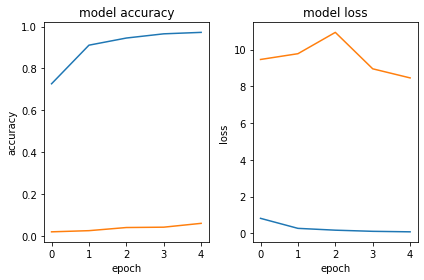

Test loss: 4.58
Test accuracy: 0.309
Optimizer loop index is : 1
Freezed layers numbers : 143
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 378s 52ms/sample - loss: 0.6621 - accuracy: 0.7851 - val_loss: 6.9525 - val_accuracy: 0.0417
Epoch 2/5
7200/7200 [==============================] - 355s 49ms/sample - loss: 0.1841 - accuracy: 0.9492 - val_loss: 8.1817 - val_accuracy: 0.0344
Epoch 3/5
7200/7200 [==============================] - 352s 49ms/sample - loss: 0.0999 - accuracy: 0.9700 - val_loss: 7.3773 - val_accuracy: 0.3683
Epoch 4/5
7200/7200 [==============================] - 351s 49ms/sample - loss: 0.0756 - accuracy: 0.9796 - val_loss: 10.2642 - val_accuracy: 0.4444
Epoch 5/5
7200/7200 [==============================] - 350s 49ms/sample - loss: 0.0605 - accuracy: 0.9837 - val_loss: 5.5040 - val_accuracy: 0.3611


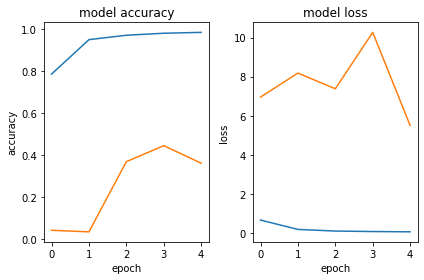

Test loss: 5.7
Test accuracy: 0.3
Optimizer loop index is : 2
Freezed layers numbers : 116
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 394s 55ms/sample - loss: 0.6520 - accuracy: 0.7947 - val_loss: 9.6833 - val_accuracy: 5.5556e-04
Epoch 2/5
7200/7200 [==============================] - 376s 52ms/sample - loss: 0.1613 - accuracy: 0.9503 - val_loss: 11.9201 - val_accuracy: 0.1094
Epoch 3/5
7200/7200 [==============================] - 378s 52ms/sample - loss: 0.0867 - accuracy: 0.9754 - val_loss: 6.6546 - val_accuracy: 0.3150
Epoch 4/5
7200/7200 [==============================] - 376s 52ms/sample - loss: 0.0808 - accuracy: 0.9749 - val_loss: 8.8652 - val_accuracy: 0.0300
Epoch 5/5
7200/7200 [==============================] - 378s 53ms/sample - loss: 0.0471 - accuracy: 0.9867 - val_loss: 14.5723 - val_accuracy: 0.0489


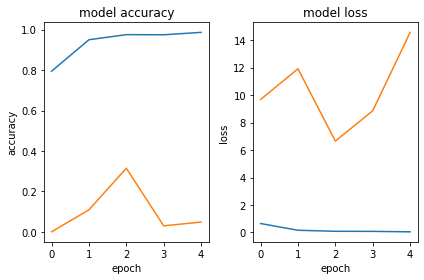

Test loss: 4.29
Test accuracy: 0.582
Optimizer loop index is : 3
Freezed layers numbers : 90
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 417s 58ms/sample - loss: 0.6741 - accuracy: 0.7858 - val_loss: 10.9747 - val_accuracy: 0.0000e+00
Epoch 2/5
7200/7200 [==============================] - 398s 55ms/sample - loss: 0.1770 - accuracy: 0.9493 - val_loss: 13.8716 - val_accuracy: 0.0000e+00
Epoch 3/5
7200/7200 [==============================] - 390s 54ms/sample - loss: 0.1069 - accuracy: 0.9722 - val_loss: 10.9703 - val_accuracy: 0.0000e+00
Epoch 4/5
7200/7200 [==============================] - 434s 60ms/sample - loss: 0.0678 - accuracy: 0.9807 - val_loss: 16.1094 - val_accuracy: 0.0000e+00
Epoch 5/5
7200/7200 [==============================] - 512s 71ms/sample - loss: 0.0456 - accuracy: 0.9876 - val_loss: 13.7911 - val_accuracy: 0.0000e+00


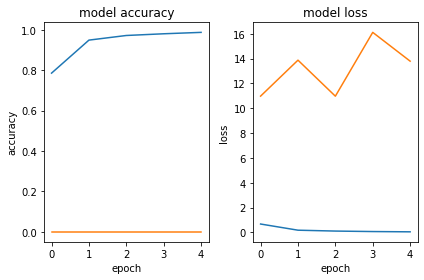

Test loss: 6.0
Test accuracy: 0.438
Optimizer loop index is : 4
Freezed layers numbers : 54
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 432s 60ms/sample - loss: 1.3948 - accuracy: 0.5057 - val_loss: 6.0459 - val_accuracy: 0.0000e+00
Epoch 2/5
7200/7200 [==============================] - 420s 58ms/sample - loss: 0.6362 - accuracy: 0.7850 - val_loss: 6.3039 - val_accuracy: 5.5556e-04
Epoch 3/5
7200/7200 [==============================] - 416s 58ms/sample - loss: 0.3541 - accuracy: 0.8832 - val_loss: 6.6269 - val_accuracy: 0.0106
Epoch 4/5
7200/7200 [==============================] - 410s 57ms/sample - loss: 0.2217 - accuracy: 0.9281 - val_loss: 7.4542 - val_accuracy: 0.0044
Epoch 5/5
7200/7200 [==============================] - 400s 56ms/sample - loss: 0.1652 - accuracy: 0.9460 - val_loss: 6.3000 - val_accuracy: 0.0850


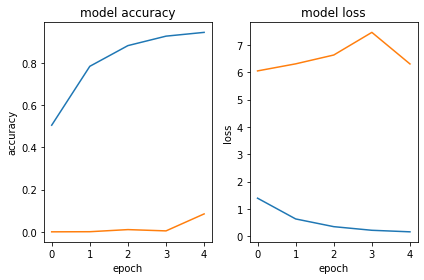

Test loss: 2.88
Test accuracy: 0.333
Optimizer loop index is : 5
Freezed layers numbers : 143
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 442s 61ms/sample - loss: 1.1335 - accuracy: 0.6065 - val_loss: 6.5304 - val_accuracy: 0.0000e+00
Epoch 2/5
7200/7200 [==============================] - 371s 52ms/sample - loss: 0.2937 - accuracy: 0.9067 - val_loss: 7.2957 - val_accuracy: 0.0000e+00
Epoch 3/5
7200/7200 [==============================] - 354s 49ms/sample - loss: 0.1259 - accuracy: 0.9608 - val_loss: 6.9580 - val_accuracy: 0.0033
Epoch 4/5
7200/7200 [==============================] - 352s 49ms/sample - loss: 0.0688 - accuracy: 0.9811 - val_loss: 6.4425 - val_accuracy: 0.0272
Epoch 5/5
7200/7200 [==============================] - 347s 48ms/sample - loss: 0.0402 - accuracy: 0.9894 - val_loss: 6.9331 - val_accuracy: 0.0450


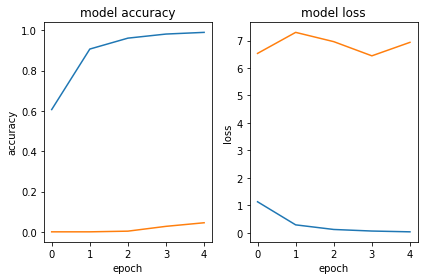

Test loss: 2.73
Test accuracy: 0.384
Optimizer loop index is : 6
Freezed layers numbers : 116
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 390s 54ms/sample - loss: 1.0353 - accuracy: 0.6475 - val_loss: 7.1968 - val_accuracy: 0.0000e+00
Epoch 2/5
7200/7200 [==============================] - 383s 53ms/sample - loss: 0.1931 - accuracy: 0.9421 - val_loss: 7.8271 - val_accuracy: 0.0022
Epoch 3/5
7200/7200 [==============================] - 380s 53ms/sample - loss: 0.0673 - accuracy: 0.9810 - val_loss: 7.9063 - val_accuracy: 0.0011
Epoch 4/5
7200/7200 [==============================] - 412s 57ms/sample - loss: 0.0293 - accuracy: 0.9933 - val_loss: 8.0333 - val_accuracy: 0.0044
Epoch 5/5
7200/7200 [==============================] - 465s 65ms/sample - loss: 0.0240 - accuracy: 0.9940 - val_loss: 8.1782 - val_accuracy: 0.0111


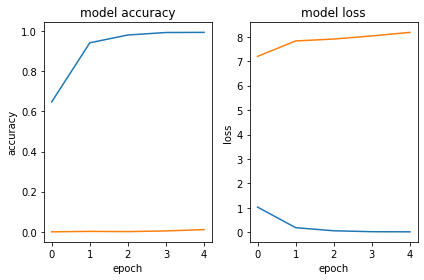

Test loss: 2.94
Test accuracy: 0.456
Optimizer loop index is : 7
Freezed layers numbers : 90
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 521s 72ms/sample - loss: 0.9729 - accuracy: 0.6636 - val_loss: 7.5227 - val_accuracy: 0.0000e+00
Epoch 2/5
7200/7200 [==============================] - 502s 70ms/sample - loss: 0.1511 - accuracy: 0.9536 - val_loss: 7.1595 - val_accuracy: 0.0067
Epoch 3/5
7200/7200 [==============================] - 431s 60ms/sample - loss: 0.0527 - accuracy: 0.9850 - val_loss: 8.0710 - val_accuracy: 0.0128
Epoch 4/5
7200/7200 [==============================] - 410s 57ms/sample - loss: 0.0328 - accuracy: 0.9908 - val_loss: 7.0425 - val_accuracy: 0.1028
Epoch 5/5
7200/7200 [==============================] - 402s 56ms/sample - loss: 0.0176 - accuracy: 0.9957 - val_loss: 7.0589 - val_accuracy: 0.1711


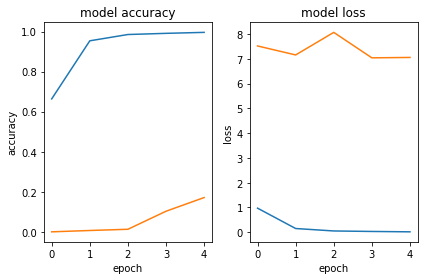

Test loss: 2.46
Test accuracy: 0.513
Optimizer loop index is : 8
Freezed layers numbers : 54
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 350s 49ms/sample - loss: 2.1908 - accuracy: 0.1882 - val_loss: 4.4202 - val_accuracy: 0.0000e+00
Epoch 2/5
7200/7200 [==============================] - 346s 48ms/sample - loss: 1.8523 - accuracy: 0.3064 - val_loss: 4.8170 - val_accuracy: 0.0000e+00
Epoch 3/5
7200/7200 [==============================] - 337s 47ms/sample - loss: 1.6037 - accuracy: 0.4226 - val_loss: 5.0644 - val_accuracy: 0.0000e+00
Epoch 4/5
7200/7200 [==============================] - 339s 47ms/sample - loss: 1.4205 - accuracy: 0.5046 - val_loss: 5.2828 - val_accuracy: 0.0000e+00
Epoch 5/5
7200/7200 [==============================] - 339s 47ms/sample - loss: 1.2683 - accuracy: 0.5622 - val_loss: 5.4650 - val_accuracy: 0.0000e+00


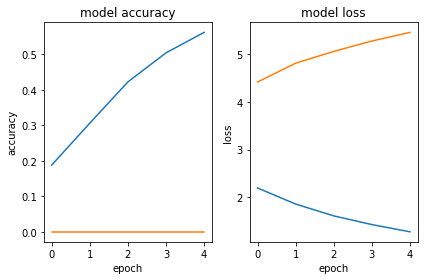

Test loss: 2.53
Test accuracy: 0.227
Optimizer loop index is : 9
Freezed layers numbers : 143
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 372s 52ms/sample - loss: 2.1630 - accuracy: 0.2083 - val_loss: 3.9703 - val_accuracy: 0.0000e+00
Epoch 2/5
7200/7200 [==============================] - 352s 49ms/sample - loss: 1.7163 - accuracy: 0.3747 - val_loss: 4.4434 - val_accuracy: 0.0000e+00
Epoch 3/5
7200/7200 [==============================] - 360s 50ms/sample - loss: 1.4053 - accuracy: 0.5128 - val_loss: 4.6939 - val_accuracy: 0.0000e+00
Epoch 4/5
7200/7200 [==============================] - 361s 50ms/sample - loss: 1.1613 - accuracy: 0.6103 - val_loss: 4.8313 - val_accuracy: 0.0000e+00
Epoch 5/5
7200/7200 [==============================] - 359s 50ms/sample - loss: 0.9769 - accuracy: 0.6765 - val_loss: 4.7700 - val_accuracy: 0.0000e+00


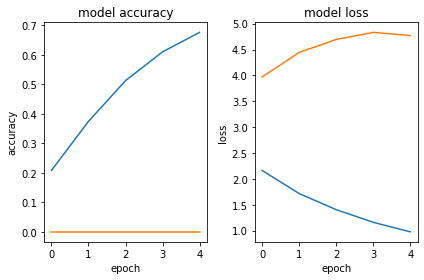

Test loss: 2.42
Test accuracy: 0.209
Optimizer loop index is : 10
Freezed layers numbers : 116
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 394s 55ms/sample - loss: 2.1928 - accuracy: 0.1939 - val_loss: 4.4714 - val_accuracy: 0.0000e+00
Epoch 2/5
7200/7200 [==============================] - 418s 58ms/sample - loss: 1.7342 - accuracy: 0.3653 - val_loss: 4.8036 - val_accuracy: 0.0000e+00
Epoch 3/5
7200/7200 [==============================] - 386s 54ms/sample - loss: 1.4050 - accuracy: 0.5203 - val_loss: 4.9742 - val_accuracy: 0.0000e+00
Epoch 4/5
7200/7200 [==============================] - 387s 54ms/sample - loss: 1.1104 - accuracy: 0.6308 - val_loss: 5.0884 - val_accuracy: 0.0000e+00
Epoch 5/5
7200/7200 [==============================] - 385s 53ms/sample - loss: 0.8887 - accuracy: 0.7132 - val_loss: 5.1664 - val_accuracy: 0.0000e+00


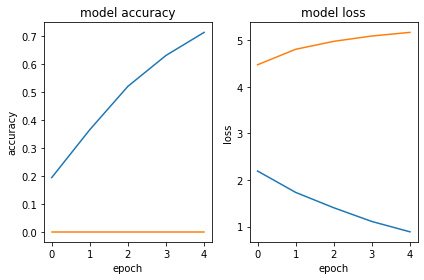

Test loss: 2.51
Test accuracy: 0.262
Optimizer loop index is : 11
Freezed layers numbers : 90
Train on 7200 samples, validate on 1800 samples
Epoch 1/5
7200/7200 [==============================] - 426s 59ms/sample - loss: 2.1180 - accuracy: 0.2254 - val_loss: 3.7309 - val_accuracy: 0.0000e+00
Epoch 2/5
7200/7200 [==============================] - 401s 56ms/sample - loss: 1.6130 - accuracy: 0.4256 - val_loss: 4.3141 - val_accuracy: 0.0000e+00
Epoch 3/5
7200/7200 [==============================] - 412s 57ms/sample - loss: 1.2265 - accuracy: 0.5867 - val_loss: 4.6366 - val_accuracy: 0.0000e+00
Epoch 4/5
7200/7200 [==============================] - 412s 57ms/sample - loss: 0.9039 - accuracy: 0.7138 - val_loss: 4.8715 - val_accuracy: 0.0000e+00
Epoch 5/5
7200/7200 [==============================] - 410s 57ms/sample - loss: 0.6847 - accuracy: 0.7908 - val_loss: 4.9559 - val_accuracy: 0.0000e+00


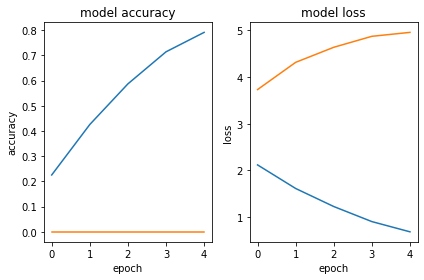

Test loss: 2.43
Test accuracy: 0.296
Optimizer loop index is : 12
Freezed layers numbers : 54


In [60]:
optimizers = [SGD(learning_rate=0.1),SGD(learning_rate=0.01),SGD(learning_rate=0.001)] 
# Adam(lr=0.1),Adam(lr=0.01),Adam(lr=0.001),

freeze_layer_counts = [
    143, # Bloc 0 to 15 frozen
    116, # Bloc 0 to 12 frozen
    90, # Bloc 0 to 9 frozen
    54 # Bloc 0 to 5 frozen
]

# This takes a LOOOOONNNNNNNGGGGG time, don't re-run it unless you're prepared to wait. 
for optimizer, freeze_first_n_layers in product(optimizers, freeze_layer_counts):
    def transfer_from_mobilenet(optimizer, freeze_first_n_layers, batch_size, epochs):
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

        # We'll use the same "squeeze" w/ dropout structure from above...
        # We have to use the "functional" API now, which is why we're not using model.add
        old_top = base_model.output
        old_top = GlobalAveragePooling2D()(old_top)
        old_top = Dense(units=640, activation='relu')(old_top)
        old_top = Dropout(rate=0.4)(old_top)
        old_top = Dense(units=320, activation='relu')(old_top)
        old_top = Dropout(rate=0.2)(old_top)
        new_top = Dense(NUM_CLASSES, activation='softmax')(old_top)

        model = Model(inputs=base_model.input, outputs=new_top)

        for layer in model.layers[:freeze_first_n_layers]:
            layer.trainable = False

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_training, y_training, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=True,
                           shuffle=True)

        return history, model



    history, model = transfer_from_mobilenet(optimizer, freeze_first_n_layers, 32, 5)
    #model.save(os.path.join(save_directory, saved_name))
    plot_training_history(history, model)
    
    loss, accuracy = model.evaluate(X_testing, y_testing, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    print(f'Optimizer loop index is : {lr}')
    print(f'Freezed layers numbers : {freeze_first_n_layers}')
    

# PART 3a - Adjusting Fully Connected Classifier with Fine Tuning on MobilNetV2

### FINAL FORMATING IMAGES BEFORE INPUT TO LEGACY NET

In [88]:
def adjust_input_image_mobilnet_v2(rgb_data):
    adjusted = ppi_mobilnet_v2(rgb_data)
    
    return adjusted

In [89]:
X_training = np.array([adjust_input_image_mobilnet_v2(x) for x in image_array_big_dataset_training])

In [90]:
y_training = to_categorical(labels_code_CATEGORY_big_dataset_training, NUM_CLASSES)

In [91]:
X_testing = np.array([adjust_input_image_mobilnet_v2(x) for x in image_array_big_dataset_testing])

In [92]:
y_testing = to_categorical(labels_code_CATEGORY_big_dataset_testing, NUM_CLASSES)

Train on 7200 samples, validate on 1800 samples
Epoch 1/10
7200/7200 [==============================] - 413s 57ms/sample - loss: 0.6498 - accuracy: 0.7907 - val_loss: 15.5033 - val_accuracy: 0.0000e+00
Epoch 2/10
7200/7200 [==============================] - 363s 50ms/sample - loss: 0.1712 - accuracy: 0.9524 - val_loss: 18.2173 - val_accuracy: 0.0000e+00
Epoch 3/10
7200/7200 [==============================] - 360s 50ms/sample - loss: 0.1200 - accuracy: 0.9633 - val_loss: 7.1325 - val_accuracy: 0.1911
Epoch 4/10
7200/7200 [==============================] - 356s 49ms/sample - loss: 0.0762 - accuracy: 0.9800 - val_loss: 6.5102 - val_accuracy: 0.1339
Epoch 5/10
7200/7200 [==============================] - 363s 50ms/sample - loss: 0.0431 - accuracy: 0.9875 - val_loss: 10.6390 - val_accuracy: 0.0811
Epoch 6/10
7200/7200 [==============================] - 414s 57ms/sample - loss: 0.0424 - accuracy: 0.9885 - val_loss: 15.1063 - val_accuracy: 0.1100
Epoch 7/10
7200/7200 [========================

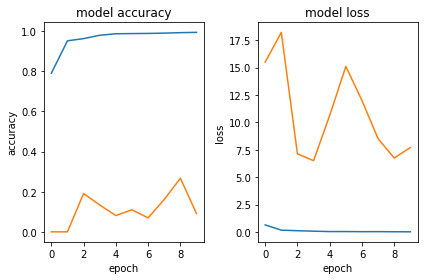

Test loss: 4.65
Test accuracy: 0.413
Optimizer loop index is : 12
Freezed layers numbers : 116


In [97]:
optimizers = [SGD(learning_rate=0.1)]

freeze_layer_counts = [116] # Bloc 0 to 12 frozen
 
for optimizer, freeze_first_n_layers in product(optimizers, freeze_layer_counts):
    def transfer_from_mobilenet(optimizer, freeze_first_n_layers, batch_size, epochs):
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

        # We'll use the same "squeeze" w/ dropout structure from above...
        # We have to use the "functional" API now, which is why we're not using model.add
        old_top = base_model.output
        old_top = GlobalAveragePooling2D()(old_top)
        old_top = Dense(units=640, activation='relu')(old_top)
        old_top = Dropout(rate=0.4)(old_top)
        old_top = Dense(units=320, activation='relu')(old_top)
        old_top = Dropout(rate=0.2)(old_top)
        new_top = Dense(NUM_CLASSES, activation='softmax')(old_top)

        model = Model(inputs=base_model.input, outputs=new_top)

        for layer in model.layers[:freeze_first_n_layers]:
            layer.trainable = False

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_training, y_training, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=True,
                           shuffle=True)

        return history, model


    history, model = transfer_from_mobilenet(optimizer, freeze_first_n_layers, 32, 10)
    #model.save(os.path.join(save_directory, saved_name))
    plot_training_history(history, model)
    
    loss, accuracy = model.evaluate(X_testing, y_testing, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    print(f'Optimizer loop index is : {lr}')
    print(f'Freezed layers numbers : {freeze_first_n_layers}')
    

Train on 7200 samples, validate on 1800 samples
Epoch 1/30
7200/7200 [==============================] - 378s 52ms/sample - loss: 0.5120 - accuracy: 0.8322 - val_loss: 9.8713 - val_accuracy: 0.0044
Epoch 2/30
7200/7200 [==============================] - 351s 49ms/sample - loss: 0.1233 - accuracy: 0.9642 - val_loss: 11.0515 - val_accuracy: 0.0767
Epoch 3/30
7200/7200 [==============================] - 355s 49ms/sample - loss: 0.0685 - accuracy: 0.9778 - val_loss: 19.6362 - val_accuracy: 0.0000e+00
Epoch 4/30
7200/7200 [==============================] - 356s 50ms/sample - loss: 0.0496 - accuracy: 0.9862 - val_loss: 12.1213 - val_accuracy: 0.0633
Epoch 5/30
7200/7200 [==============================] - 359s 50ms/sample - loss: 0.0355 - accuracy: 0.9886 - val_loss: 13.8871 - val_accuracy: 0.0139
Epoch 6/30
7200/7200 [==============================] - 349s 48ms/sample - loss: 0.0220 - accuracy: 0.9935 - val_loss: 14.2594 - val_accuracy: 0.0217
Epoch 7/30
7200/7200 [===========================

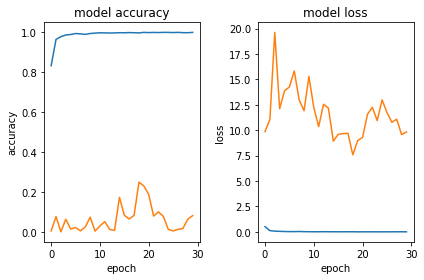

Test loss: 2.58
Test accuracy: 0.524
Optimizer loop index is : 12
Freezed layers numbers : 116


In [98]:
save_directory = 'saved_models'

optimizers = [SGD(learning_rate=0.1)]

freeze_layer_counts = [116]

model_saver=ModelCheckpoint('WEIGHTS_ONLY_CHECKPOINT_BEST_CNN_TRANSFER_MOBILNETV2_WITH_FINE_TUNNING_FAMILY_FACES.hdf5',
                            save_best_only=True)

for optimizer, freeze_first_n_layers in product(optimizers, freeze_layer_counts):
    def transfer_from_mobilenet(optimizer, freeze_first_n_layers, batch_size, epochs):
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

        # We'll use the same "squeeze" w/ dropout structure from above...
        # We have to use the "functional" API now, which is why we're not using model.add
        old_top = base_model.output
        old_top = GlobalAveragePooling2D()(old_top)
        old_top = Dense(units=128, activation='relu')(old_top)
        old_top = Dropout(rate=0.2)(old_top)
        new_top = Dense(NUM_CLASSES, activation='softmax')(old_top)

        model = Model(inputs=base_model.input, outputs=new_top)

        for layer in model.layers[:freeze_first_n_layers]:
            layer.trainable = False

        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(X_training, y_training, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=True,
                           shuffle=True, callbacks=[model_saver])

        return history, model

    history, model = transfer_from_mobilenet(optimizer, freeze_first_n_layers, 32, 30)
    #model.save(os.path.join(save_directory, saved_name))
    plot_training_history(history, model)
    
    loss, accuracy = model.evaluate(X_testing, y_testing, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    print(f'Optimizer loop index is : {lr}')
    print(f'Freezed layers numbers : {freeze_first_n_layers}')

# PART 3b - Adjusting Fully Connected Classifier but NO Fine Tuning on MobilNetV2 ...
using MOBILNET_V2, all frozen

### FINAL FORMATING IMAGES BEFORE INPUT TO LEGACY NET

In [37]:
def adjust_input_image_mobilnet_v2(rgb_data):
    adjusted = ppi_mobilnet_v2(rgb_data)
    
    return adjusted

In [38]:
X_training = np.array([adjust_input_image_mobilnet_v2(x) for x in image_array_big_dataset_training])

In [39]:
y_training = to_categorical(labels_code_CATEGORY_big_dataset_training, NUM_CLASSES)

In [40]:
X_testing = np.array([adjust_input_image_mobilnet_v2(x) for x in image_array_big_dataset_testing])

In [41]:
y_testing = to_categorical(labels_code_CATEGORY_big_dataset_testing, NUM_CLASSES)

In [42]:
model_saver=ModelCheckpoint('WEIGHTS_ONLY_CHECKPOINT_BEST_CNN_TRANSFER_MOBILNETV2_NO_FINE_TUNNING_FAMILY_FACES.hdf5',
                            save_best_only=True)

In [43]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96,96, 3))

In [44]:
training_features = base_model.predict(X_training)
testing_features = base_model.predict(X_testing)

In [51]:
model = Sequential()

In [52]:
model.add(GlobalAveragePooling2D(input_shape=training_features.shape[1:]))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(training_features, y_training, batch_size=32, epochs=10, validation_split=0.1, verbose=True,
                   shuffle=True, callbacks=[model_saver])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_4 ( (None, 1280)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               163968    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 9)                 585       
Total params: 172,809
Trainable params: 172,809
Non-trainable params: 0
________________________________________________

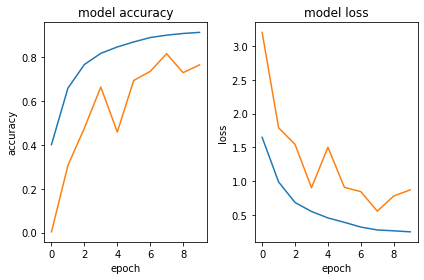

Test loss: 4.58
Test accuracy: 0.32


In [53]:
plot_training_history(history, model)
loss, accuracy = model.evaluate(testing_features, y_testing, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

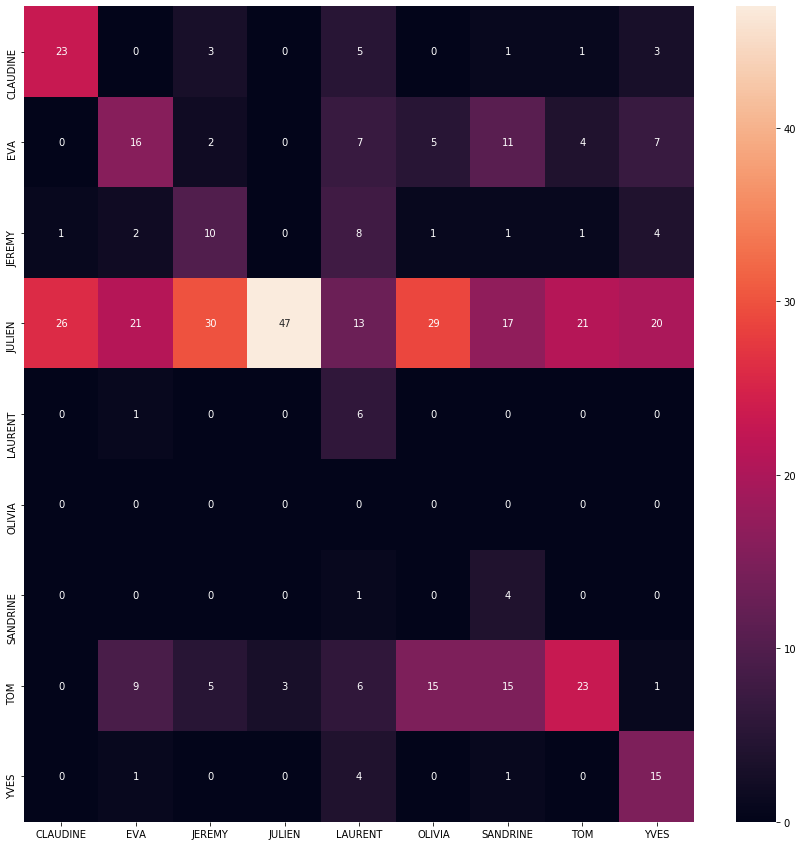

In [54]:
# When did our evaluator do poorly?
predictions = model.predict(testing_features)
cm = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(y_testing, axis=1))
plt.figure(figsize = (15, 15))

name_labels = labels_list

sn.heatmap(cm, annot=True, xticklabels=name_labels, yticklabels=name_labels)
plt.show()

# PART 3c - Adjusting Fully Connected Classifier but NO Fine Tuning on VGG19
using VGG19, all frozen

### FINAL FORMATING IMAGES BEFORE INPUT TO LEGACY NET

In [82]:
def adjust_input_image_vgg19(rgb_data):
    adjusted = ppi_vgg19(rgb_data)
    
    return adjusted

In [83]:
X_training = np.array([adjust_input_image_vgg19(x) for x in image_array_big_dataset_training])

In [84]:
y_training = to_categorical(labels_code_CATEGORY_big_dataset_training, NUM_CLASSES)

In [85]:
X_testing = np.array([adjust_input_image_vgg19(x) for x in image_array_big_dataset_testing])

In [86]:
y_testing = to_categorical(labels_code_CATEGORY_big_dataset_testing, NUM_CLASSES)

In [87]:
model_saver=ModelCheckpoint('WEIGHTS_ONLY_CHECKPOINT_BEST_CNN_TRANSFER_VGG19_NO_FINE_TUNNING_FAMILY_FACES.hdf5',
                            save_best_only=True)

In [88]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(96,96, 3))

In [89]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [95]:
training_features = base_model.predict(X_training)
testing_features = base_model.predict(X_testing)

In [106]:
# Warning : No more 1280 feature maps of 3x3 pixels (adapt classifier squeeze accordinigly)
training_features.shape

(9000, 3, 3, 512)

In [96]:
model = Sequential()

In [97]:
model.add(GlobalAveragePooling2D(input_shape=training_features.shape[1:]))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(training_features, y_training, batch_size=32, epochs=30, validation_split=0.1, verbose=True,
                   shuffle=True, callbacks=[model_saver])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_6 ( (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 9)                 585       
Total params: 74,505
Trainable params: 74,505
Non-trainable params: 0
__________________________________________________

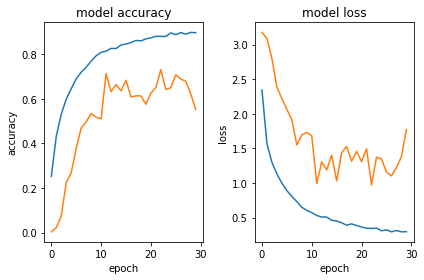

Test loss: 1.45
Test accuracy: 0.693


In [98]:
plot_training_history(history, model)
loss, accuracy = model.evaluate(testing_features, y_testing, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

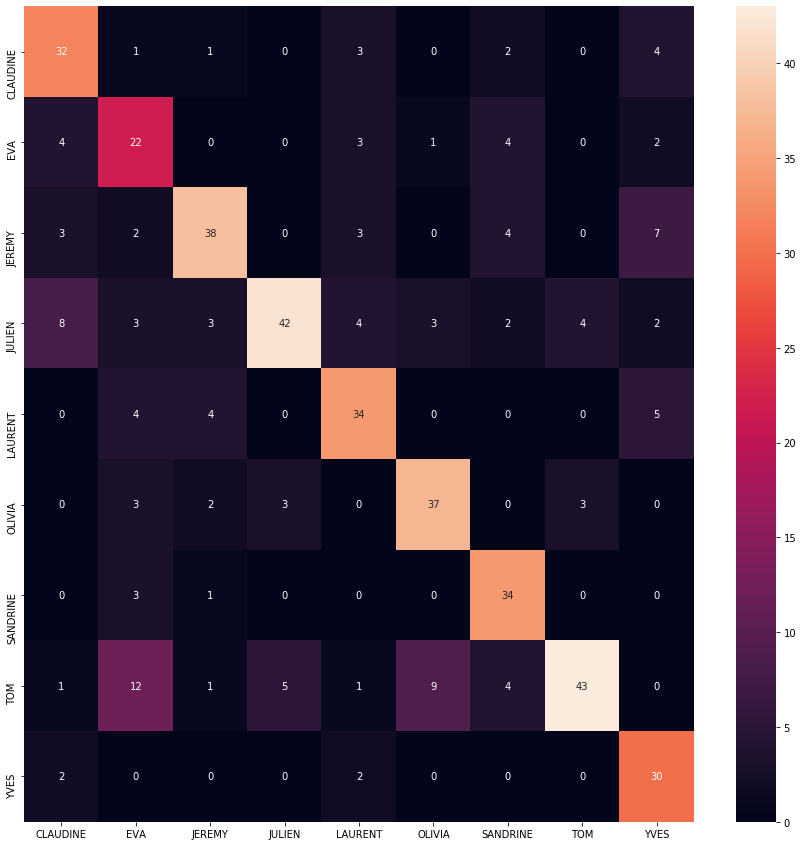

In [99]:
# When did our evaluator do poorly?
predictions = model.predict(testing_features)
cm = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(y_testing, axis=1))
plt.figure(figsize = (15, 15))

name_labels = labels_list

sn.heatmap(cm, annot=True, xticklabels=name_labels, yticklabels=name_labels)
plt.show()

Close to the final product: diagonal Confusion Matrix + 70% on CV and unseen data, overfitting was controlled

In another notebook, I used XGBClassifier (Tree based classifier), VERY long training but good scores achieved

More ideas :
    Eigen's faces preprocessing (would requires  lot more pictures per person)
    Apply the filter on both original and augmented pictures (so far, only augmented ones were smoothed)
    Avoid augmenting this data with tilting image

# MANAGE THE FINAL MODEL

In [ ]:
# same all the model + last epoch's weights
model.save('TRAINED_MODEL_LAST_EPOCH_CNN_FAMILY_FACES.hdf5')

In [ ]:
# save last epoch's 'weights only
model.save_weights('WEIGHTS_ONLY_LAST_EPOCH_CNN_FAMILY_FACES.hdf5')

In [ ]:
model = load_model('TRAINED_MODEL_LAST_EPOCH_CNN_FAMILY_FACES.hdf5')

In [ ]:
model.summary()

# Importing useful Libraries

In [1]:
import os # Operating System library imported
import glob # to make operation on directory like listing files

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
import time
from PIL import Image
import seaborn as sn

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

from sklearn import linear_model
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from IPython.display import Image

In [4]:
# this should look familiar from the previous labs. 
# We could choose any of the pre-built nets here instead. 
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as ppi_mobilnet_v2, decode_predictions as dcp_mobilnet_v2
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as ppi_resnet50, decode_predictions as dcp_resnet50
from tensorflow.keras.applications.xception import Xception, preprocess_input as ppi_xception, decode_predictions as dcp_xception
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input as ppi_vgg19, decode_predictions as dcp_vgg19


from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, MaxPool2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import initializers, regularizers

In [5]:
from skimage import *
from skimage import measure
from skimage.color import *
from skimage.filters import *
from skimage.util import *
from skimage.restoration import *
from skimage.restoration import inpaint
from skimage.transform import *
from skimage.segmentation import *
from skimage.feature import *
from skimage.color import rgb2gray

In [6]:
from itertools import product

In [7]:
from keract import get_activations, display_activations,display_heatmaps